# Life Expectancy and GDP

We will import the libraries we need so we can scope the information in the csv file.
For this, we will import the following libraries
1. import pandas as pd
2. import numpy as np
3. from matplotlib import pyplot as plt
4. import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#making a df with pd
df = pd.read_csv('all_data.csv')
print(df.head())
print(df.columns)
# Country, Year, Life expectancy at birth (years), GDP
#print(df.dtypes)
#Object, int, float, float
#print(df.info())
#all columns are non null with data from 0 to 95 (96 overall)
#print(df.describe())
# min and max year = 2000 and 2015
# min and max Life expectancy at birth (years) = 44.30 and 81


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


### Renaming the columns so that they are easy to call

We will employ the .rename() method to rename the columns so that it is easy to call upon

In [3]:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'}, 
          inplace=True)
print(df.columns)

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')


## We should check out what unique entries of countries are there

In [4]:
print(df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Lets plot a bar chart of GDP vs Country to get an actual feel of what things look like

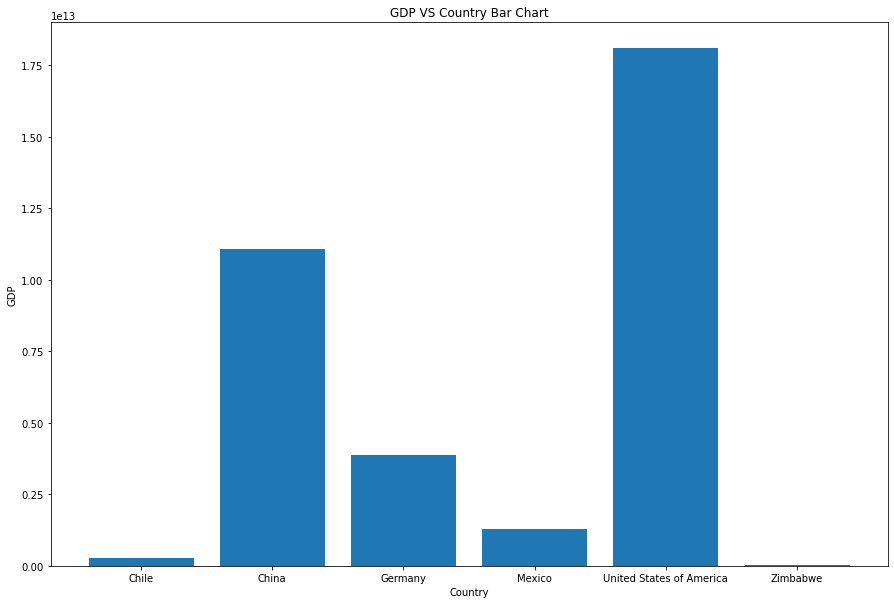

In [11]:
ax = plt.subplots(figsize=(15,10))
plt.bar(df.country, df.gdp)
#plt.xticks(rotation=90)
plt.title('GDP VS Country Bar Chart')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.show()
plt.close('all')

### Checking the distribution of the Life expectancy in each Country

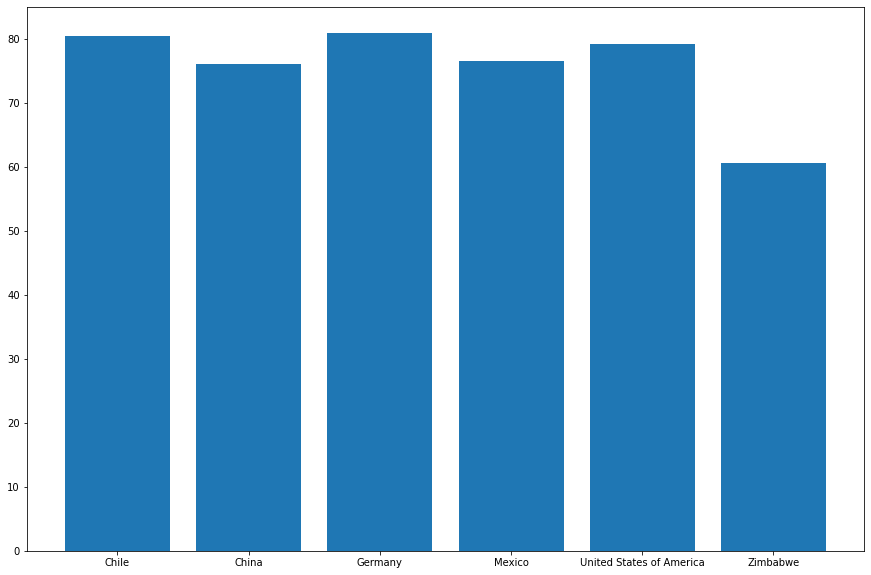

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
plt.bar(df.country, df.life_expectancy)
plt.show()

### Inference

1. USA has the largest GDP followed by China and then Germany
2. The smallest GDP is Zimbabwe following second is Chile
3. I am curious to see the life expectancy of Zimbabwe compared to USA 

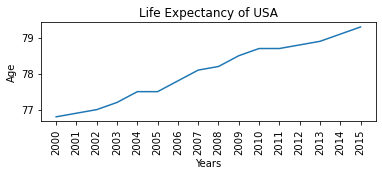

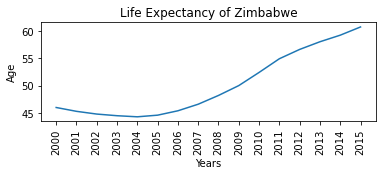

In [7]:
# We want to see the USA's year, VS age and the same for zimbabwe
usa = df[df['country'] == 'United States of America']
zimbabwe = df[df['country'] == 'Zimbabwe']
#print(usa.head())
#print(zimbabwe.head())
#plotting two graphs side by side
ax1 = plt.subplot(2, 1, 1)
plt.plot(range(len(usa.year)), usa.life_expectancy)
ax1.set_xticks(range(len(usa.year)))
ax1.set_xticklabels(usa.year, rotation = 90)
ax1.set_title('Life Expectancy of USA')
plt.xlabel('Years')
plt.ylabel('Age')
plt.show()

#now we plot for zimbabwe
ax2 = plt.subplot(2, 1, 2)
plt.plot(range(len(zimbabwe.year)), zimbabwe.life_expectancy)
ax2.set_xticks(range(len(zimbabwe.year)))
ax2.set_xticklabels(zimbabwe.year, rotation = 90)
ax2.set_title('Life Expectancy of Zimbabwe')
plt.xlabel('Years')
plt.ylabel('Age')
plt.show()
plt.close('all')

### Inference

We initally wanted to plot these Graphs side by side, but after plotting one below the other, the graphs look more neater.
We can see the life expectancy in the USA is much Higher than Zimbabwe by almost 10 years difference

# One graph to check the life expectancy of all the countries

We will check the change in ages over the past 15 years

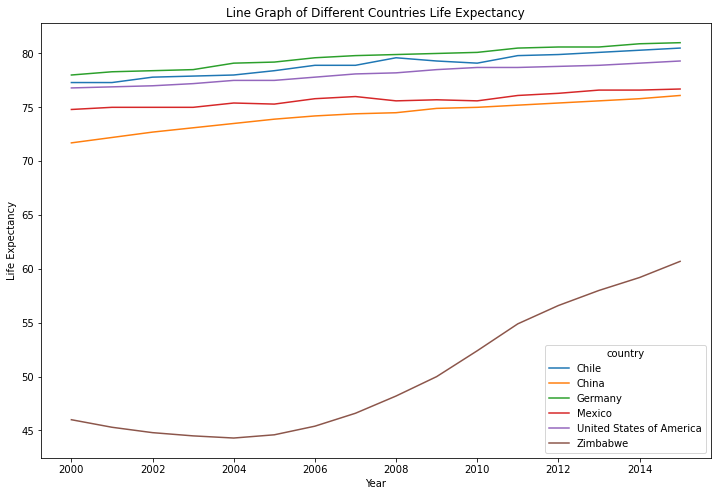

In [8]:
f, ax3 = plt.subplots(figsize=(12,8))
ax3 = sns.lineplot(data=df, x = 'year', y='life_expectancy', hue = 'country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
ax3.set_title('Line Graph of Different Countries Life Expectancy')
plt.show()

### Inference

1. From the graph, we can see that Zimbabwe has improved their life expectancy from 2004 to 2014 by almost 15 years. It is still doing fairly bad
2. Germany has the best life expectancy, but it has the Third highest GDP, more investigation can be done on that
3. You can see that China's life expectancy is the second last though they have the 2nd highest GDP 
4. USA has the third highest life expectancy which is good since they have the highest GDP, this shows that they have good regards for the quality of life and the health care system
5. This leads our investigation to consider the health care system in act in these countries

### Line graph of the GDP Distribution through the years

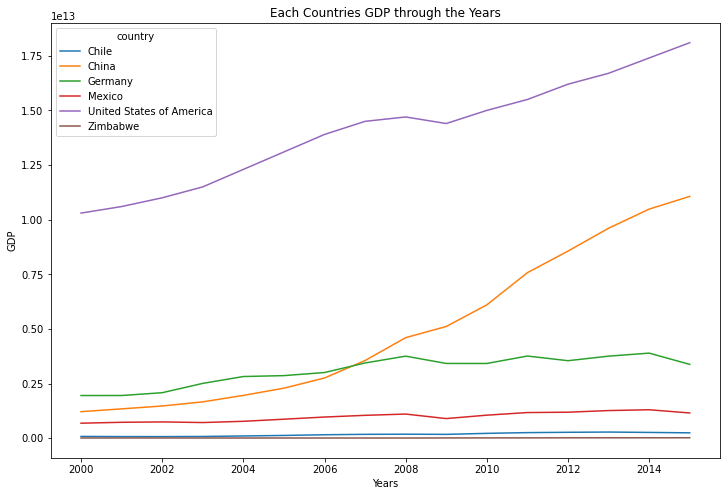

In [16]:
f, ax4 = plt.subplots(figsize=(12, 8))
ax4 = sns.lineplot(data = df, x = 'year', y = 'gdp', hue='country')
ax4.set_title('Each Countries GDP through the Years')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

## Making multiple plots to compare the performace

Since the years range from the 2000 to 2015, it will be good to see how the life expectancy of the countries did for each year.

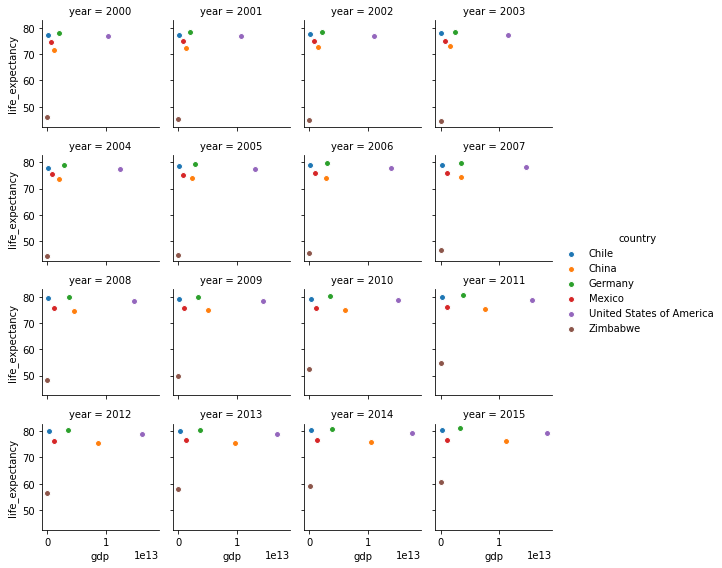

In [19]:
#using FaceGrid method in seaborn to help with this output
g = sns.FacetGrid(data=df, col = 'year', hue = 'country', col_wrap = 4, height =2)
g = (g.map(plt.scatter, 'gdp', 'life_expectancy', edgecolor = 'w').add_legend())
plt.show()

### Inference

From the above graph, we can see that China has made significance imporovment in the last 15 years
Taking a look into their past, we can see that China had attributed their increase in GDP to large capital investments (large domestic savings and foreign investment) and rapid large scale production